In [4]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [5]:
#Reading data

df = pd.read_csv('day.csv')

# Data analysis

In [6]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
df.shape

(730, 16)

In [8]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


# Data Cleaning

In [10]:
#Checking for null values in columns
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
# Droping the duplicates
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(730, 16)

#### No duplicates found

In [13]:
# Droping the unwanted columns
df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 74.1 KB


In [15]:
#Checking unique values in each column
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

# EDA

In [16]:
#Mapping categorical columns
df.season.replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'},inplace = True)

df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

df.mnth = df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

df.weekday = df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})

In [17]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 74.1+ KB


## Pair plot for linear relationship

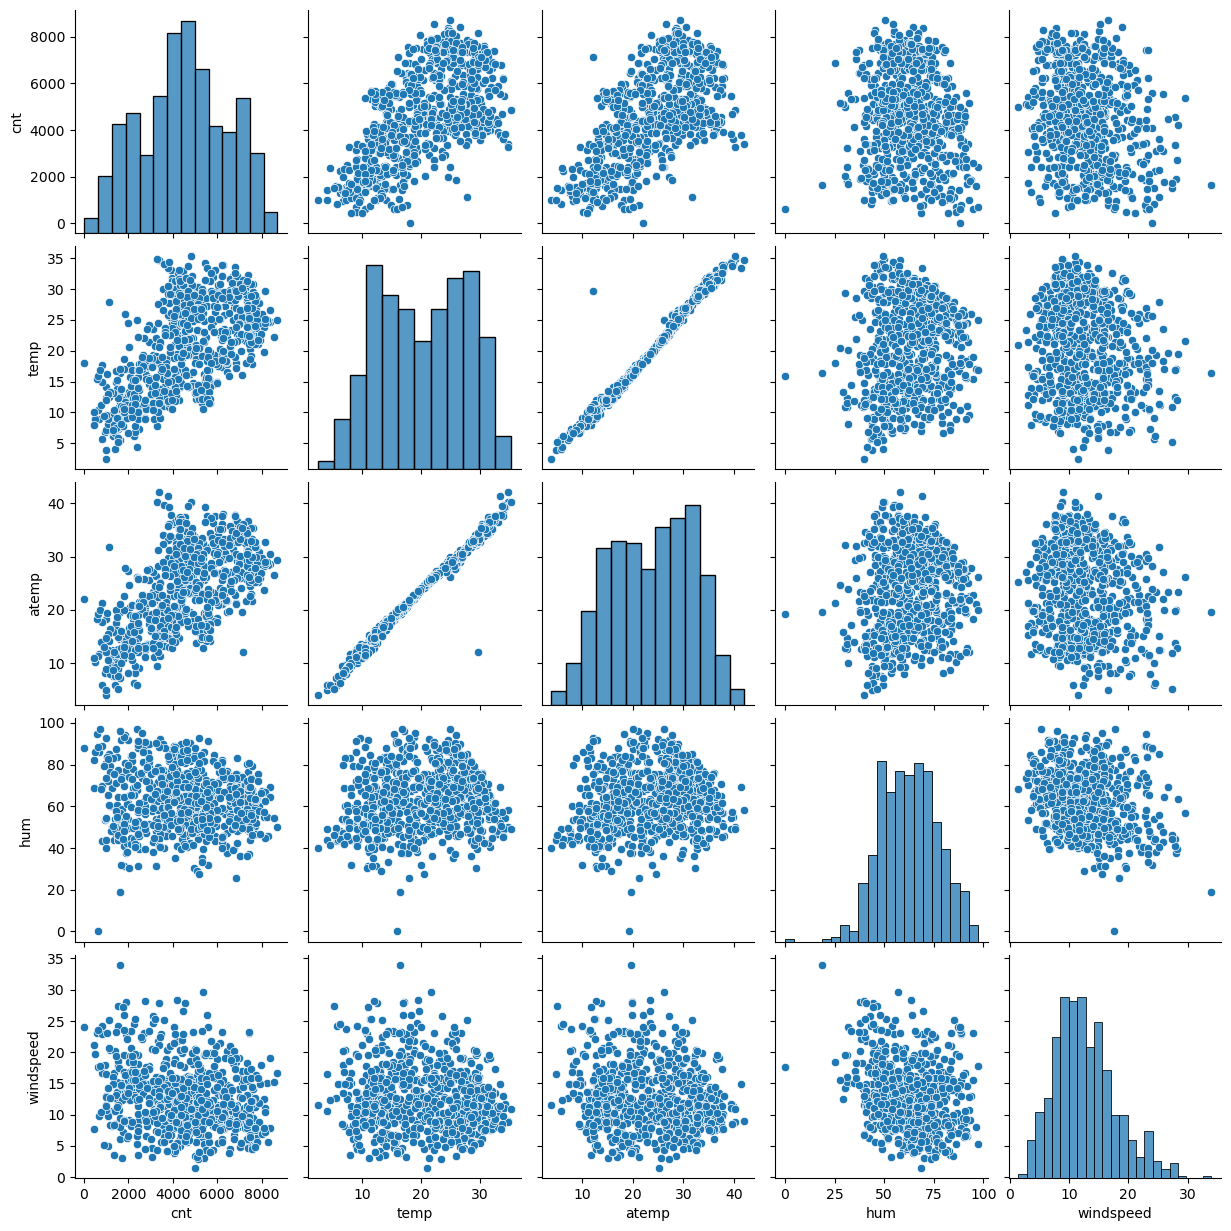

In [21]:
#Pairlot for continuous numeric variables
sns.pairplot(df,vars=['cnt', 'temp', 'atemp','hum', 'windspeed'])
plt.show()

Observation
- temp and atem has the highest corelation with the target variable cnt
- temp and atemp are highly co-related with each other

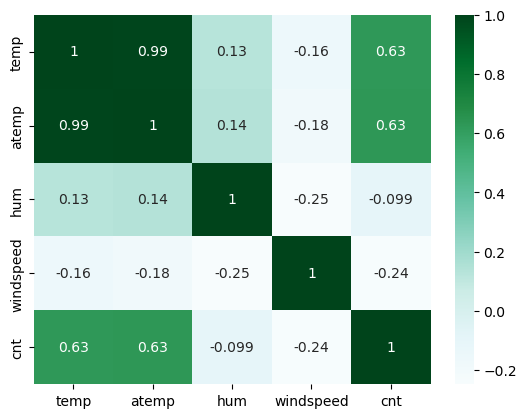

In [144]:
# Checking continuous variables relationship with each other
sns.heatmap(df[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

#### Here we see that temp and atemp has correlation more than .99 means almost 1 (highly correlated) and atemp seems to be derived from temp so atemp field can be dropped here only

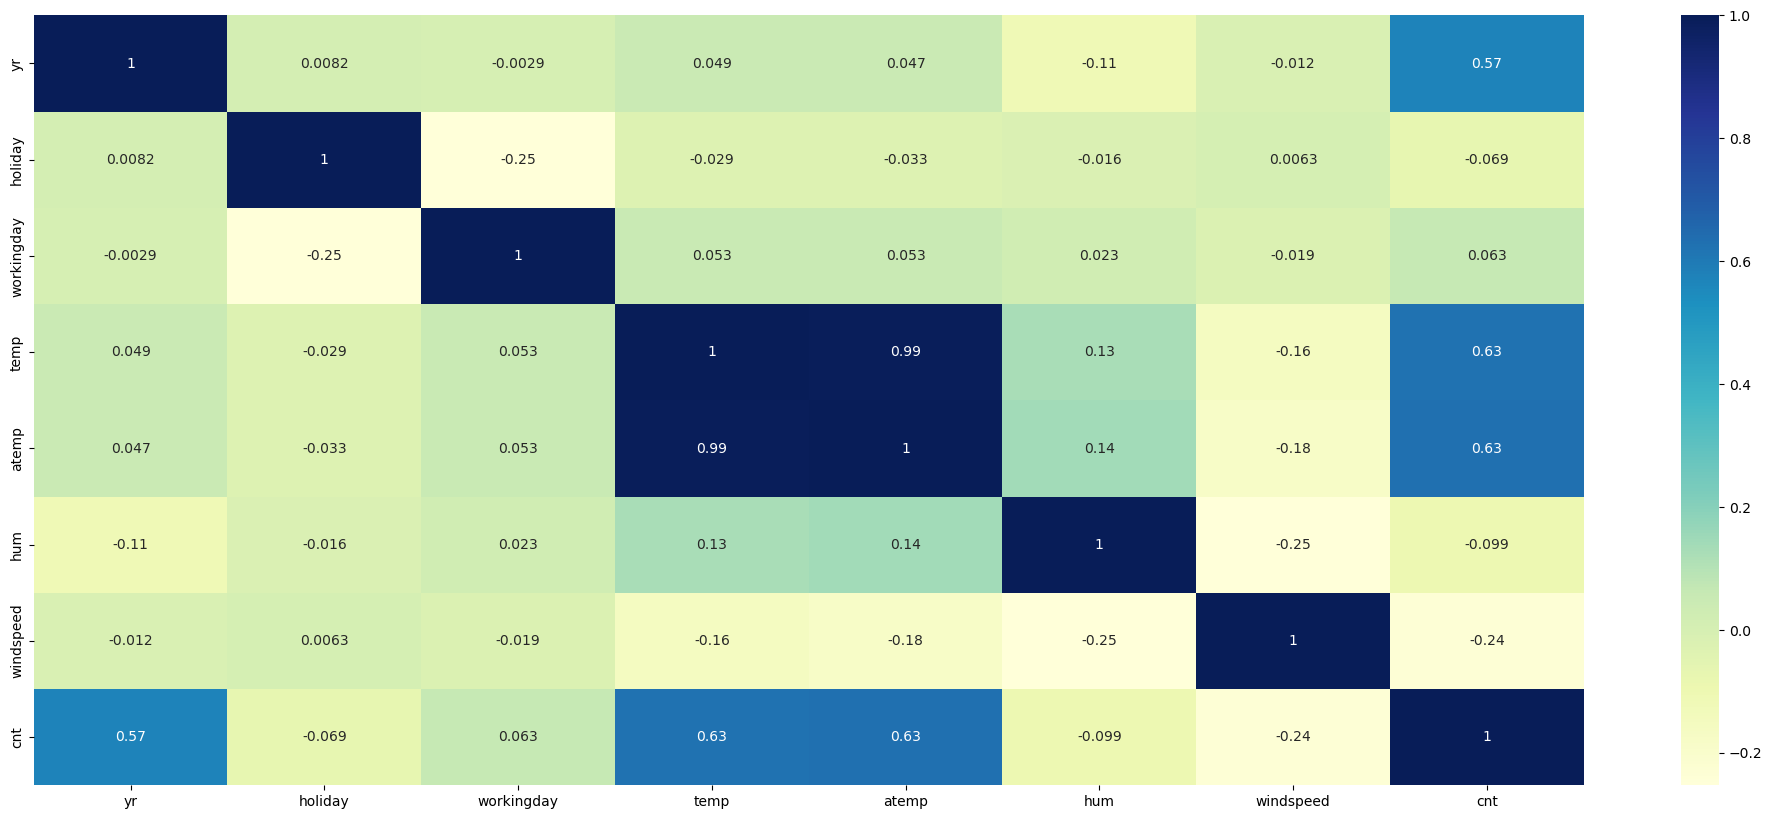

In [145]:
#Calculate Correlation
corr = df.corr()
plt.figure(figsize=(25,10))

#Draw Heatmap of correlation
sns.heatmap(corr,annot=True, cmap='YlGnBu' )
plt.show()

#### From the correlation map, temp, atemp and days_old seems to be highly correlated and only should variable can be considered for the model. However let us elminate it based on the Variance Inflation Factor later during the model building.
#### We also see Target variable has a linear relationship with some of the  indeptendent variables. Good sign for building a linear regression Model.

## Analysing categorical variables with target variables

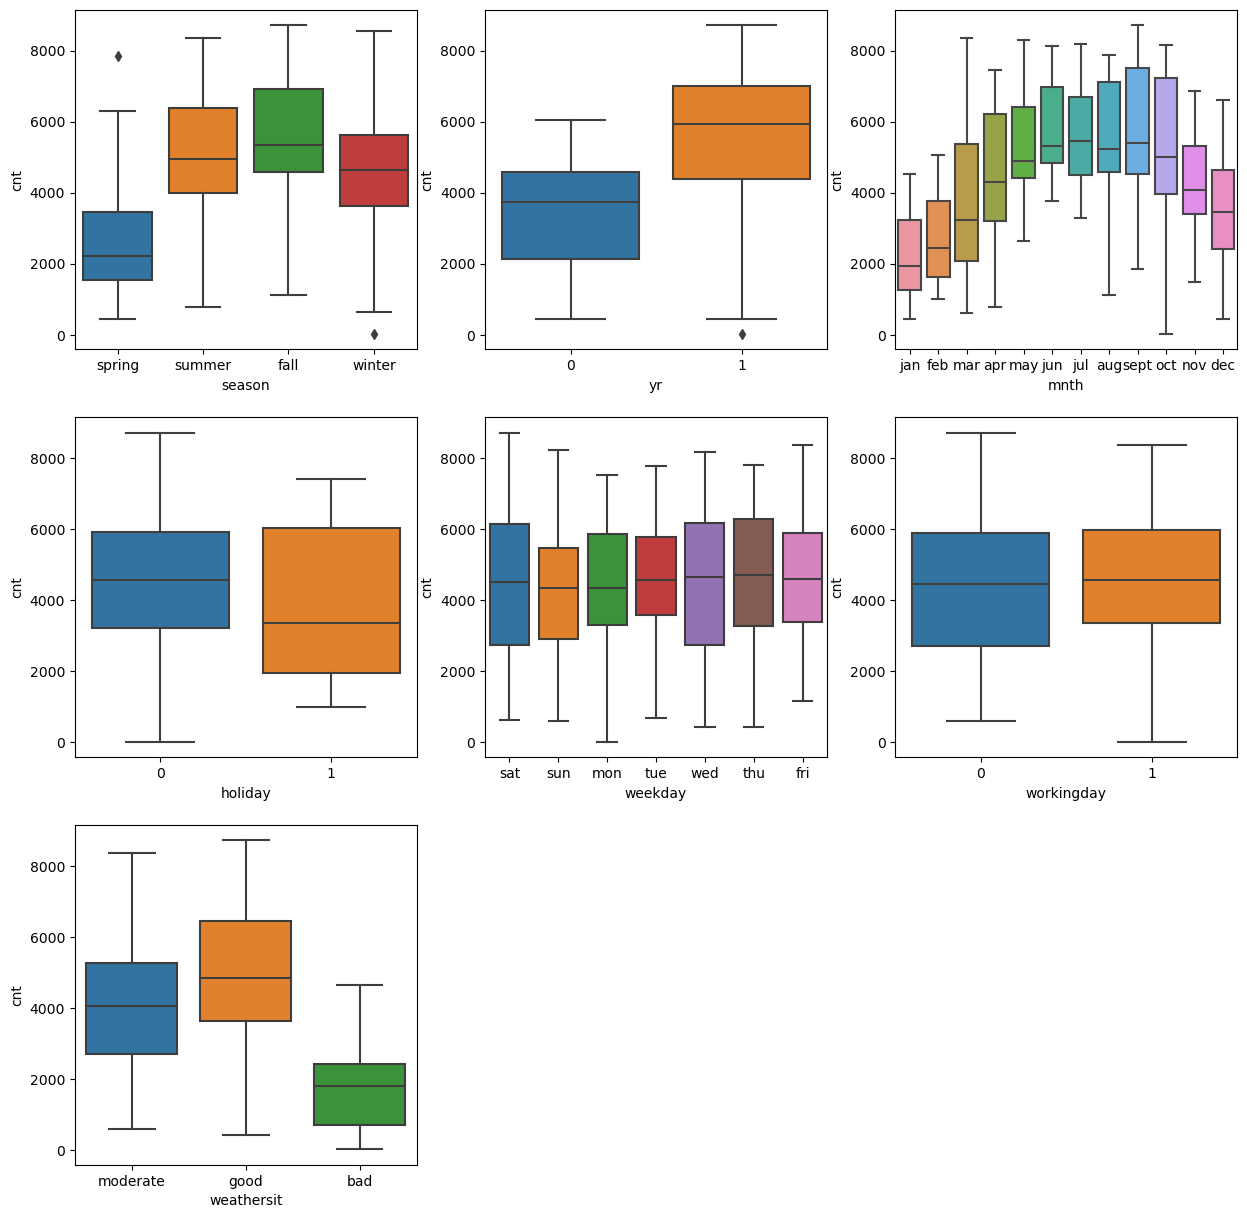

In [146]:
# Boxplot for categorical variables to see demands
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=df, x=i[1], y='cnt')
plt.show()

## Data Preparation for linear regression

In [147]:
#Dummy variable creation for month, weekday, weathersit and season
months_df=pd.get_dummies(df.mnth, drop_first=True)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(df.season,drop_first=True)

In [148]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [149]:
#Merging the dataframe, with dummy variable dataset
df_new=pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [150]:
df_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sat,sun,thu,tue,wed,good,moderate,spring,summer,winter
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,...,0,0,0,0,0,1,0,1,0,0
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,...,0,0,0,1,0,1,0,1,0,0
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,...,0,0,0,0,1,1,0,1,0,0


In [151]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  aug         730 non-null    uint8  
 13  dec         730 non-null    uint8  
 14  feb         730 non-null    uint8  
 15  jan         730 non-null    uint8  
 16  jul         730 non-null    uint8  
 17  jun         730 non-null    uint8  
 18  mar         730 non-null    uint8  
 19  may         730 non-null    u

In [152]:
#Dropping unnecessary columns as we have created dummy variables
df_new.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1, inplace=True)

In [153]:
df_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,good,moderate,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,1,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,1,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,1,0,1,0,0


In [154]:
df_new.shape

(730, 30)

In [155]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   aug         730 non-null    uint8  
 9   dec         730 non-null    uint8  
 10  feb         730 non-null    uint8  
 11  jan         730 non-null    uint8  
 12  jul         730 non-null    uint8  
 13  jun         730 non-null    uint8  
 14  mar         730 non-null    uint8  
 15  may         730 non-null    uint8  
 16  nov         730 non-null    uint8  
 17  oct         730 non-null    uint8  
 18  sept        730 non-null    uint8  
 19  mon         730 non-null    u

## Model Building

#### Splitting the data into training and testing sets

In [156]:
#Spliting the dataframe into train and test
np.random.seed(0)
df_train, df_test = train_test_split(df_new, train_size=0.7, random_state = 100)

In [157]:
#Training dataset
df_train.shape

(510, 30)

In [158]:
#Testing dataset
df_test.shape

(220, 30)

In [159]:
#MinMaxScaler to rescaling the features
scaler=MinMaxScaler()

In [160]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,good,moderate,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,1,0,1,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,1,0,0,0,1,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,0,0,0,0,0,1,0,1,0


In [161]:
#Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [162]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,good,moderate,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,1,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


In [163]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,good,moderate,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.625490,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.484471,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


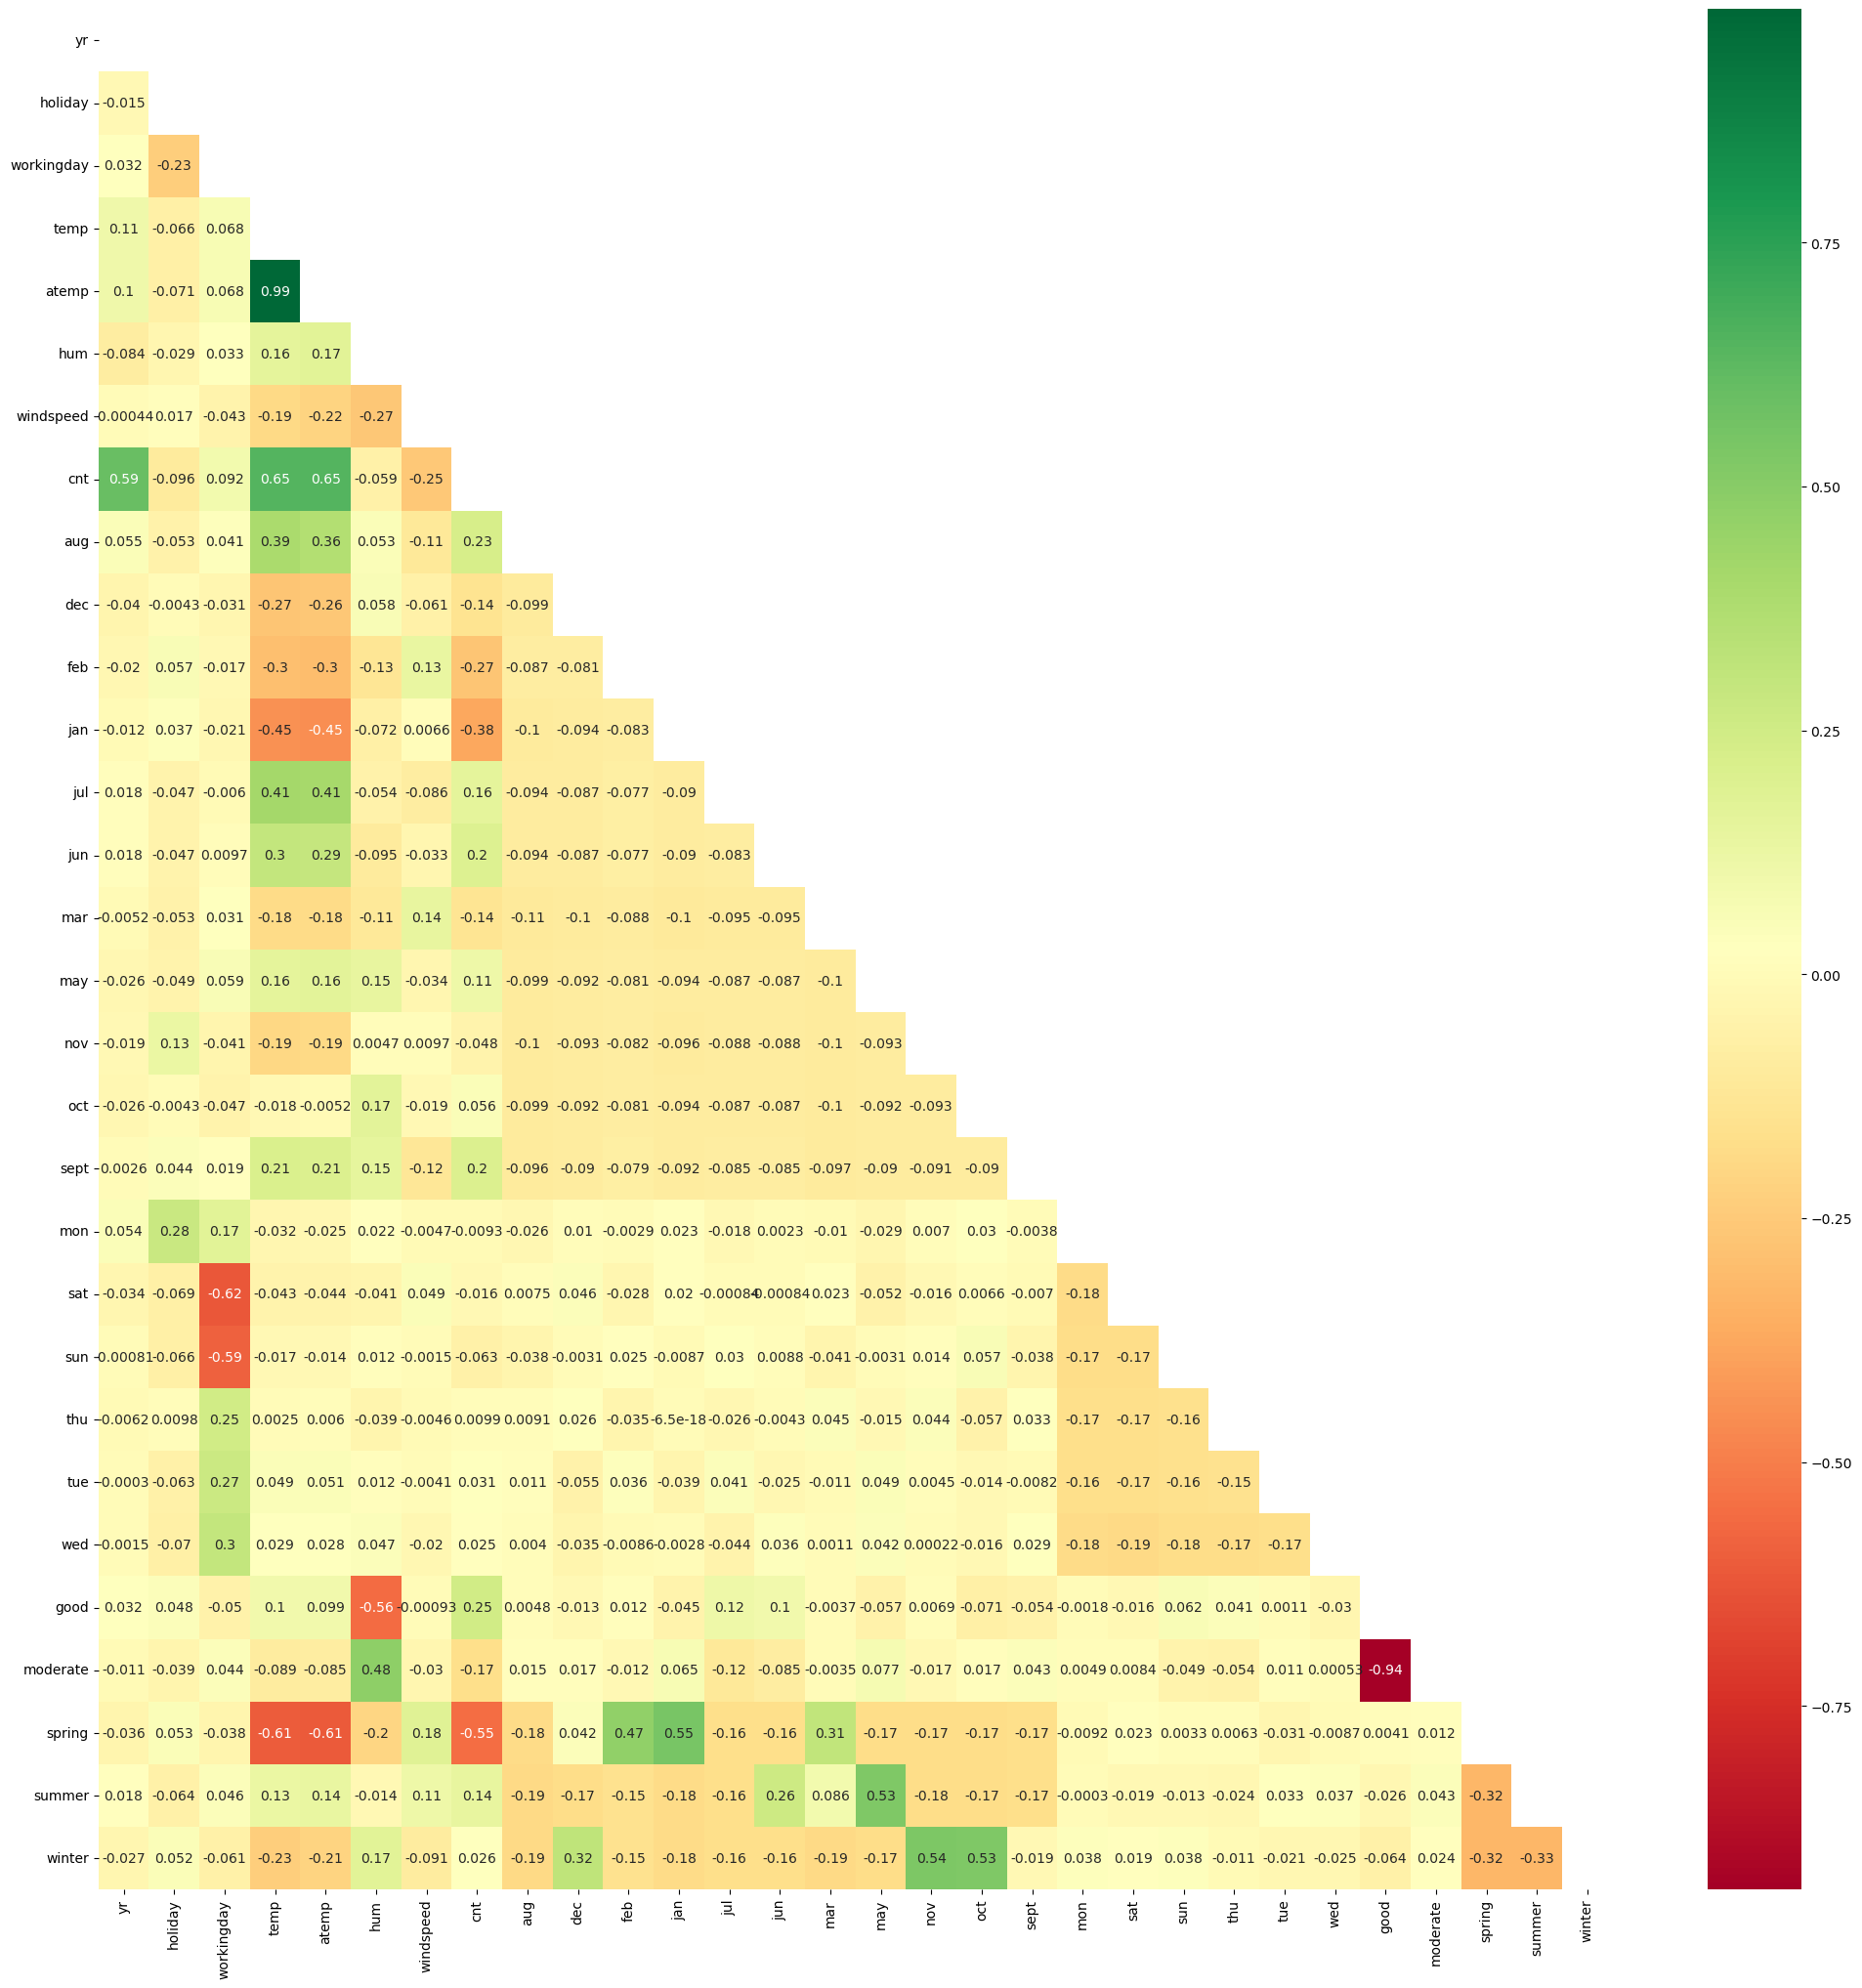

In [164]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

#### cnt seems to have correlation with year variable and temp. Similarly, misty and humidity show correlation. Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.

## Building Linear Model

In [165]:
from sklearn.feature_selection import RFE

In [127]:
# Building the Linear Model

y_train = df_train.pop('cnt')
X_train = df_train

KeyError: 'cnt'

In [166]:
# Build a Lienar Regression model using SKLearn for RFE

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [167]:
#Cut down number of features to 15 using automated approach
rfe = RFE(lr,step=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), step=15)

In [168]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 2),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('jul', False, 2),
 ('jun', False, 2),
 ('mar', False, 2),
 ('may', False, 2),
 ('nov', False, 2),
 ('oct', False, 2),
 ('sept', True, 1),
 ('mon', False, 2),
 ('sat', False, 2),
 ('sun', False, 2),
 ('thu', False, 2),
 ('tue', False, 2),
 ('wed', False, 2),
 ('good', True, 1),
 ('moderate', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [169]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'dec', 'jan',
       'sept', 'good', 'moderate', 'spring', 'summer', 'winter'],
      dtype='object')


In [170]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['workingday', 'aug', 'feb', 'jul', 'jun', 'mar', 'may', 'nov', 'oct',
       'mon', 'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [184]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [185]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [186]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
2,temp,380.74
3,atemp,365.85
4,hum,26.06
9,good,14.97
10,moderate,9.07
11,spring,5.54
5,windspeed,4.90
13,winter,4.04
12,summer,2.97
0,yr,2.09


In [174]:
#1st linear regression model
X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.6
Date:                Tue, 09 May 2023   Prob (F-statistic):          4.12e-187
Time:                        23:06:31   Log-Likelihood:                 507.38
No. Observations:                 510   AIC:                            -984.8
Df Residuals:                     495   BIC:                            -921.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0465      0.048      0.978      0.3

In [175]:
X_train_new = X_train_rfe.drop(['atemp'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
3,hum,26.05
2,temp,22.77
8,good,14.95
9,moderate,9.05
10,spring,5.47
4,windspeed,4.64
12,winter,3.91
11,summer,2.87
0,yr,2.09
6,jan,1.78


In [176]:
#2nd linear regression model
X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.4
Date:                Tue, 09 May 2023   Prob (F-statistic):          2.86e-188
Time:                        23:06:51   Log-Likelihood:                 507.38
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     496   BIC:                            -927.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0468      0.047      0.986      0.3

In [177]:
X_train_new = X_train_new.drop(['jan'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
3,hum,25.10
2,temp,21.01
7,good,14.35
8,moderate,8.81
9,spring,5.34
4,windspeed,4.61
11,winter,3.83
10,summer,2.83
0,yr,2.09
5,dec,1.31


In [178]:
#3rd linear regression model
X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     215.9
Date:                Tue, 09 May 2023   Prob (F-statistic):          2.47e-188
Time:                        23:07:55   Log-Likelihood:                 504.73
No. Observations:                 510   AIC:                            -983.5
Df Residuals:                     497   BIC:                            -928.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0336      0.047      0.711      0.4

In [179]:
X_train_new = X_train_new.drop(['dec'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
3,hum,24.61
2,temp,20.23
6,good,14.04
7,moderate,8.72
8,spring,5.32
4,windspeed,4.60
10,winter,3.80
9,summer,2.80
0,yr,2.09
5,sept,1.28


In [180]:
#4th linear regression model
X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.6
Date:                Tue, 09 May 2023   Prob (F-statistic):          2.31e-189
Time:                        23:08:16   Log-Likelihood:                 504.34
No. Observations:                 510   AIC:                            -984.7
Df Residuals:                     498   BIC:                            -933.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0319      0.047      0.675      0.5

In [181]:
X_train_new = X_train_new.drop(['hum'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
5,good,13.98
2,temp,11.62
6,moderate,7.90
3,windspeed,4.59
7,spring,3.85
9,winter,2.44
8,summer,2.37
0,yr,2.07
4,sept,1.23
1,holiday,1.04


In [182]:
#5th linear regression model
X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Tue, 09 May 2023   Prob (F-statistic):          1.47e-186
Time:                        23:10:06   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0942      0.038     -2.481      0.0

In [183]:
lr_5.params

const       -0.094177
yr           0.234132
holiday     -0.096316
temp         0.477737
windspeed   -0.148098
sept         0.090998
good         0.285031
moderate     0.206291
spring      -0.055406
summer       0.062076
winter       0.094476
dtype: float64

## Residual Analysis of train data and validation

In [188]:
X_train_lm_5

,const,yr,holiday,temp,windspeed,sept,good,moderate,spring,summer,winter
576,1.0,1,0,0.815169,0.264686,0,1,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,1,1,0,0
728,1.0,1,0,0.245101,0.663106,0,1,0,1,0,0
482,1.0,1,0,0.395666,0.188475,0,0,1,0,1,0
111,1.0,0,0,0.345824,0.380981,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,1,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,1,0,1,0,0
350,1.0,0,0,0.248216,0.431816,0,0,1,0,0,1
79,1.0,0,0,0.462664,0.529881,0,0,1,0,1,0


In [200]:
y_train_pred = lr_5.predict(X_train_lm_5)

### Normality of error terms

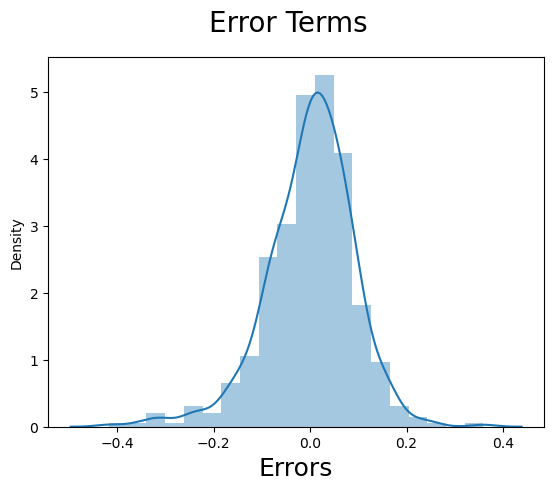

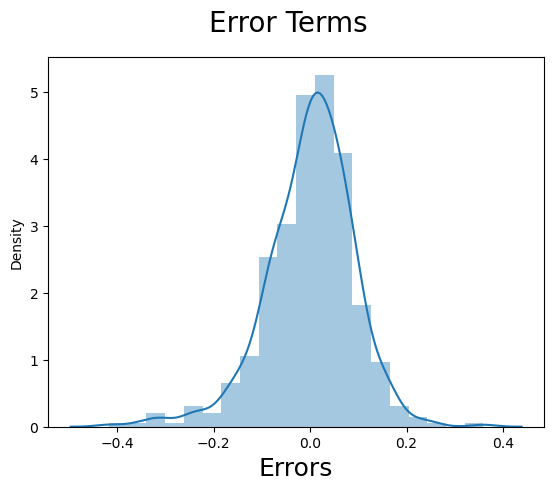

In [211]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)
plt.show()

#### Multi Colinearity

In [205]:
calculateVIF(X_train_new)

,Features,VIF
5,good,13.98
2,temp,11.62
6,moderate,7.90
3,windspeed,4.59
7,spring,3.85
9,winter,2.44
8,summer,2.37
0,yr,2.07
4,sept,1.23
1,holiday,1.04


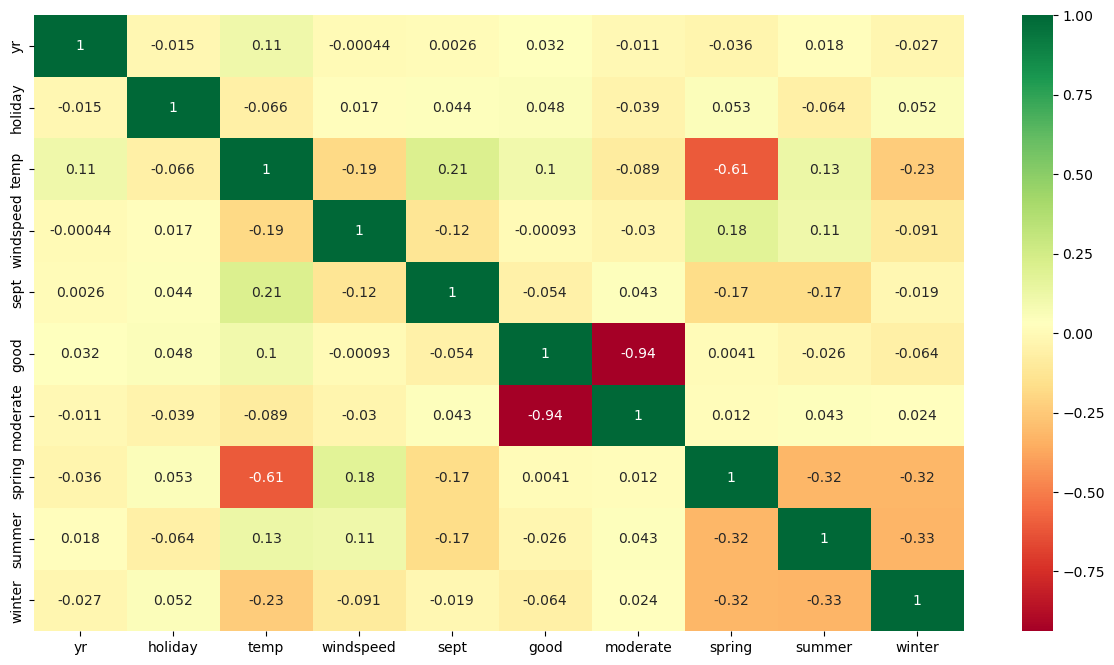

In [209]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

## Linearity

In [220]:
lr_5.params

const       -0.094177
yr           0.234132
holiday     -0.096316
temp         0.477737
windspeed   -0.148098
sept         0.090998
good         0.285031
moderate     0.206291
spring      -0.055406
summer       0.062076
winter       0.094476
dtype: float64

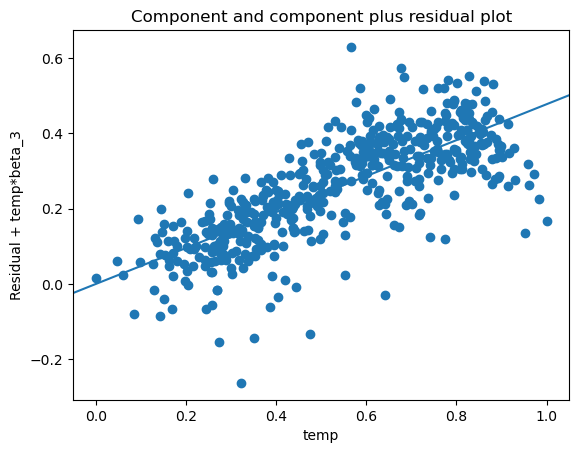

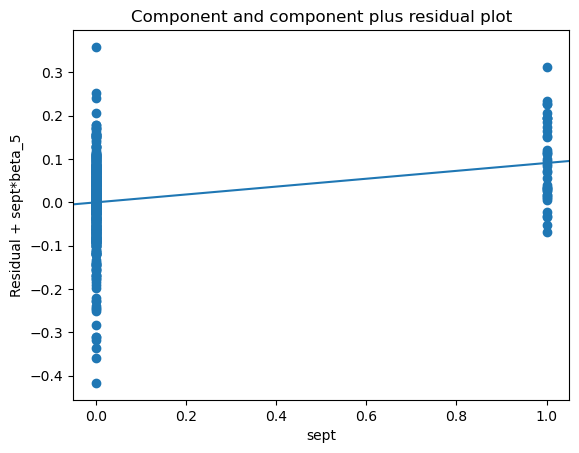

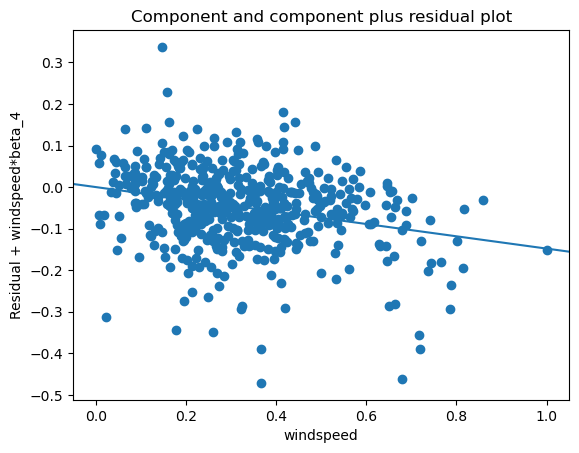

In [222]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_5, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_5, 'sept')
plt.show()

sm.graphics.plot_ccpr(lr_5, 'windspeed')
plt.show()

#### Homoscedasticity

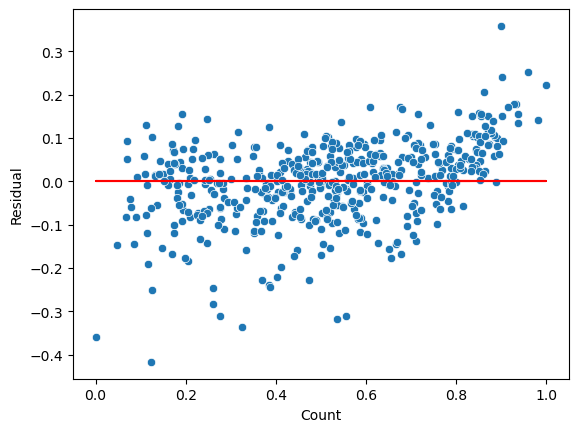

In [224]:
y_train_pred = lr_5.predict(X_train_lm_5)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No visible pattern observed from above plot for residuals.

## Making Predictions Using the Final Model

In [226]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,good,moderate,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,1,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,1,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,1,0,0,1,0


In [227]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,good,moderate,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.654545,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.476601,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [228]:
y_test = df_test.pop('cnt')
X_test = df_test

In [229]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_5 = sm.add_constant(X_test)

In [230]:
y_pred = lr_5.predict(X_test_lm_5)

In [231]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8038

## Model Evaluation

In [234]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)

Text(0, 0.5, 'y_pred')

In [236]:
round(lr_5.params,4)

const       -0.0942
yr           0.2341
holiday     -0.0963
temp         0.4777
windspeed   -0.1481
sept         0.0910
good         0.2850
moderate     0.2063
spring      -0.0554
summer       0.0621
winter       0.0945
dtype: float64

In [237]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7944


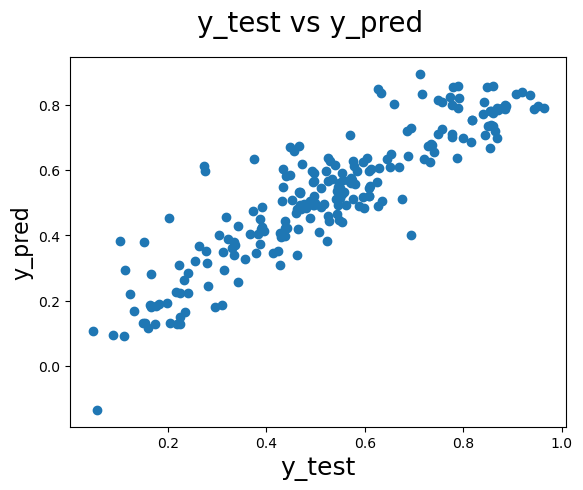

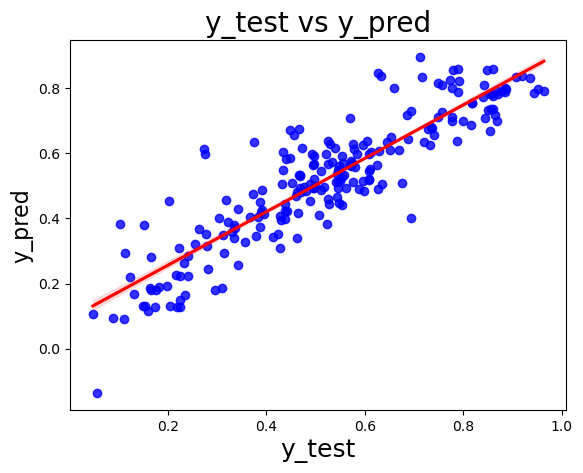

In [238]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

## Comparision between Training and Testing dataset:
- Train dataset R^2          : 0.833
- Test dataset R^2           : 0.8038
- Train dataset Adjusted R^2 : 0.829    
- Test dataset Adjusted R^2  : 0.7944

#### Demand of bikes depend on year, holiday, temp, windspeed, sep, Light_snowrain, Misty, spring, summer and winter.